In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import modified_lorentzian

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Create time-series
time = np.linspace(-1, 1, 1000)
baseline = 0.
slope = 1.
t0 = 0.
DeltaP = 1.
Gamma = 0.01
profile = modified_lorentzian(time, baseline, slope, t0, DeltaP, Gamma) + normal(scale=slope/10., size=len(time))
mt = MetTimeseries(time, profile)

0.11227653350458017
True


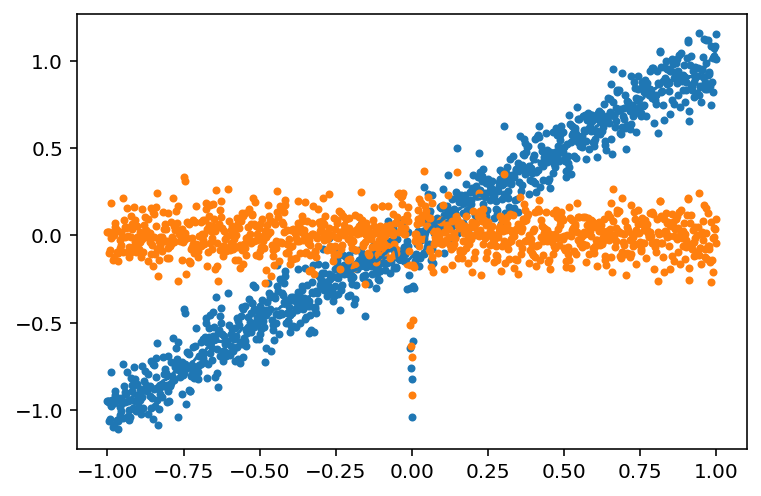

In [7]:
# Detrend
window_size = 10*Gamma
detrended_pressure = mt.detrend_pressure_timeseries(window_size)
print(np.std(mt.detrended_pressure))
print(np.isclose(np.std(mt.detrended_pressure), 0.2, atol=0.1))

plt.scatter(mt.time, mt.pressure, marker='.')
plt.scatter(mt.time, mt.detrended_pressure, marker='.')
plt.plot(mt.time, mt.pressure_trend)

In [7]:
# Test time-series write-out
write_str = mt.write_out_detrended_timeseries(test_mode=True)
print(write_str);

# time, pressure
-1, -0.0476288
-0.997998, -0.323928
-0.995996, -0.174894
-0.993994, -0.525886
-0.991992, -0.264505
-0.98999, -0.138508
-0.987988, -0.212954
-0.985986, -0.391914
-0.983984, -0.182274
-0.981982, -0.417734
-0.97998, -0.193137
-0.977978, 0.127007
-0.975976, -0.0827968
-0.973974, -0.245346
-0.971972, -0.197549
-0.96997, -0.108163
-0.967968, -0.0293289
-0.965966, -0.062057
-0.963964, -0.265119
-0.961962, -0.18605
-0.95996, -0.272605
-0.957958, -0.141947
-0.955956, -0.129326
-0.953954, -0.0480108
-0.951952, -0.233806
-0.94995, -0.0765399
-0.947948, -0.417488
-0.945946, -0.0877179
-0.943944, -0.205148
-0.941942, -0.293344
-0.93994, -0.290395
-0.937938, -0.216062
-0.935936, -0.0667737
-0.933934, -0.204324
-0.931932, -0.227231
-0.92993, 0.103741
-0.927928, -0.174742
-0.925926, -0.0618563
-0.923924, -0.144648
-0.921922, -0.379098
-0.91992, -0.220123
-0.917918, -0.138829
-0.915916, -0.0312227
-0.913914, -0.222409
-0.911912, -0.0796037
-0.90991, -0.0438844
-0.907908, -0.0623865
-0.

In [54]:
from scipy.stats import mode
print(mt.time[1:] - mt.time[0:-1])
print(mode(mt.time[1:] - mt.time[0:-1]).mode[0])

[0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002 0.002002
 0.002002 0.002002 0.002002 0.002002 0.002002 0.002

7.641130268500866 0.0030030030030030463 0.004004004004003914


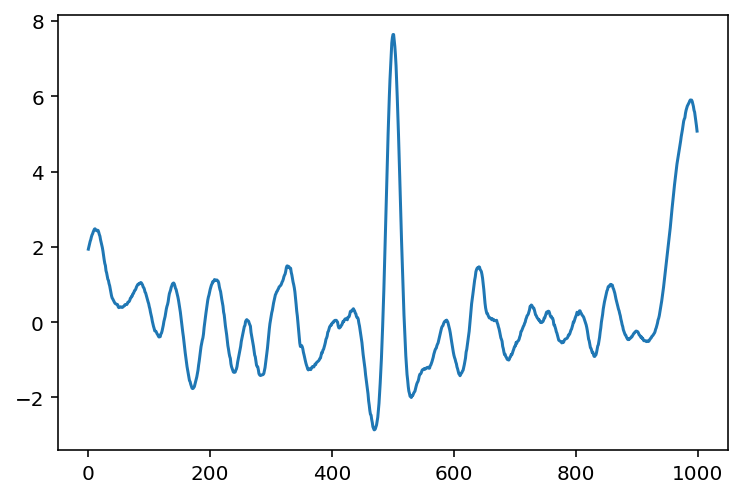

In [11]:
# plt.plot(mt.time, profile)
conv = mt.apply_lorentzian_matched_filter(10.*Gamma, 1./np.pi)
mx_ind = np.argmax(mt.convolution)

print(mt.convolution[mx_ind], np.abs(mt.time[mx_ind]), 2.*mt.sampling)
# plt.plot(mt.time, mt.convolution)
# plt.plot(mt.time, profile)
plt.plot(mt.convolution)
# Make sure convolution returns a strong peak at the right time
# assert ((np.abs(mt.time[mx_ind]) < Gamma) & (mt.convolution[mx_ind] > 7.))

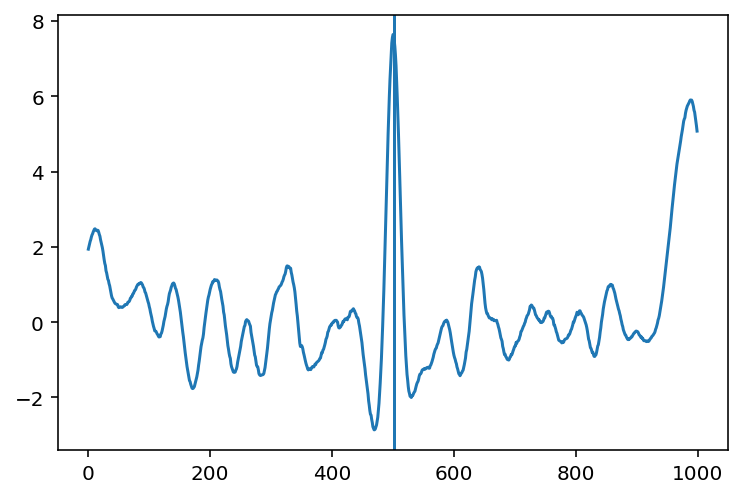

In [43]:
# Test find_vortices
times, peak_widths = mt.find_vortices(detection_threshold=7)
plt.plot(mt.convolution)
plt.axvline(times[0])

# Make sure the max peak in the convolution is the 
assert(mt.time[times[0]] < Gamma)

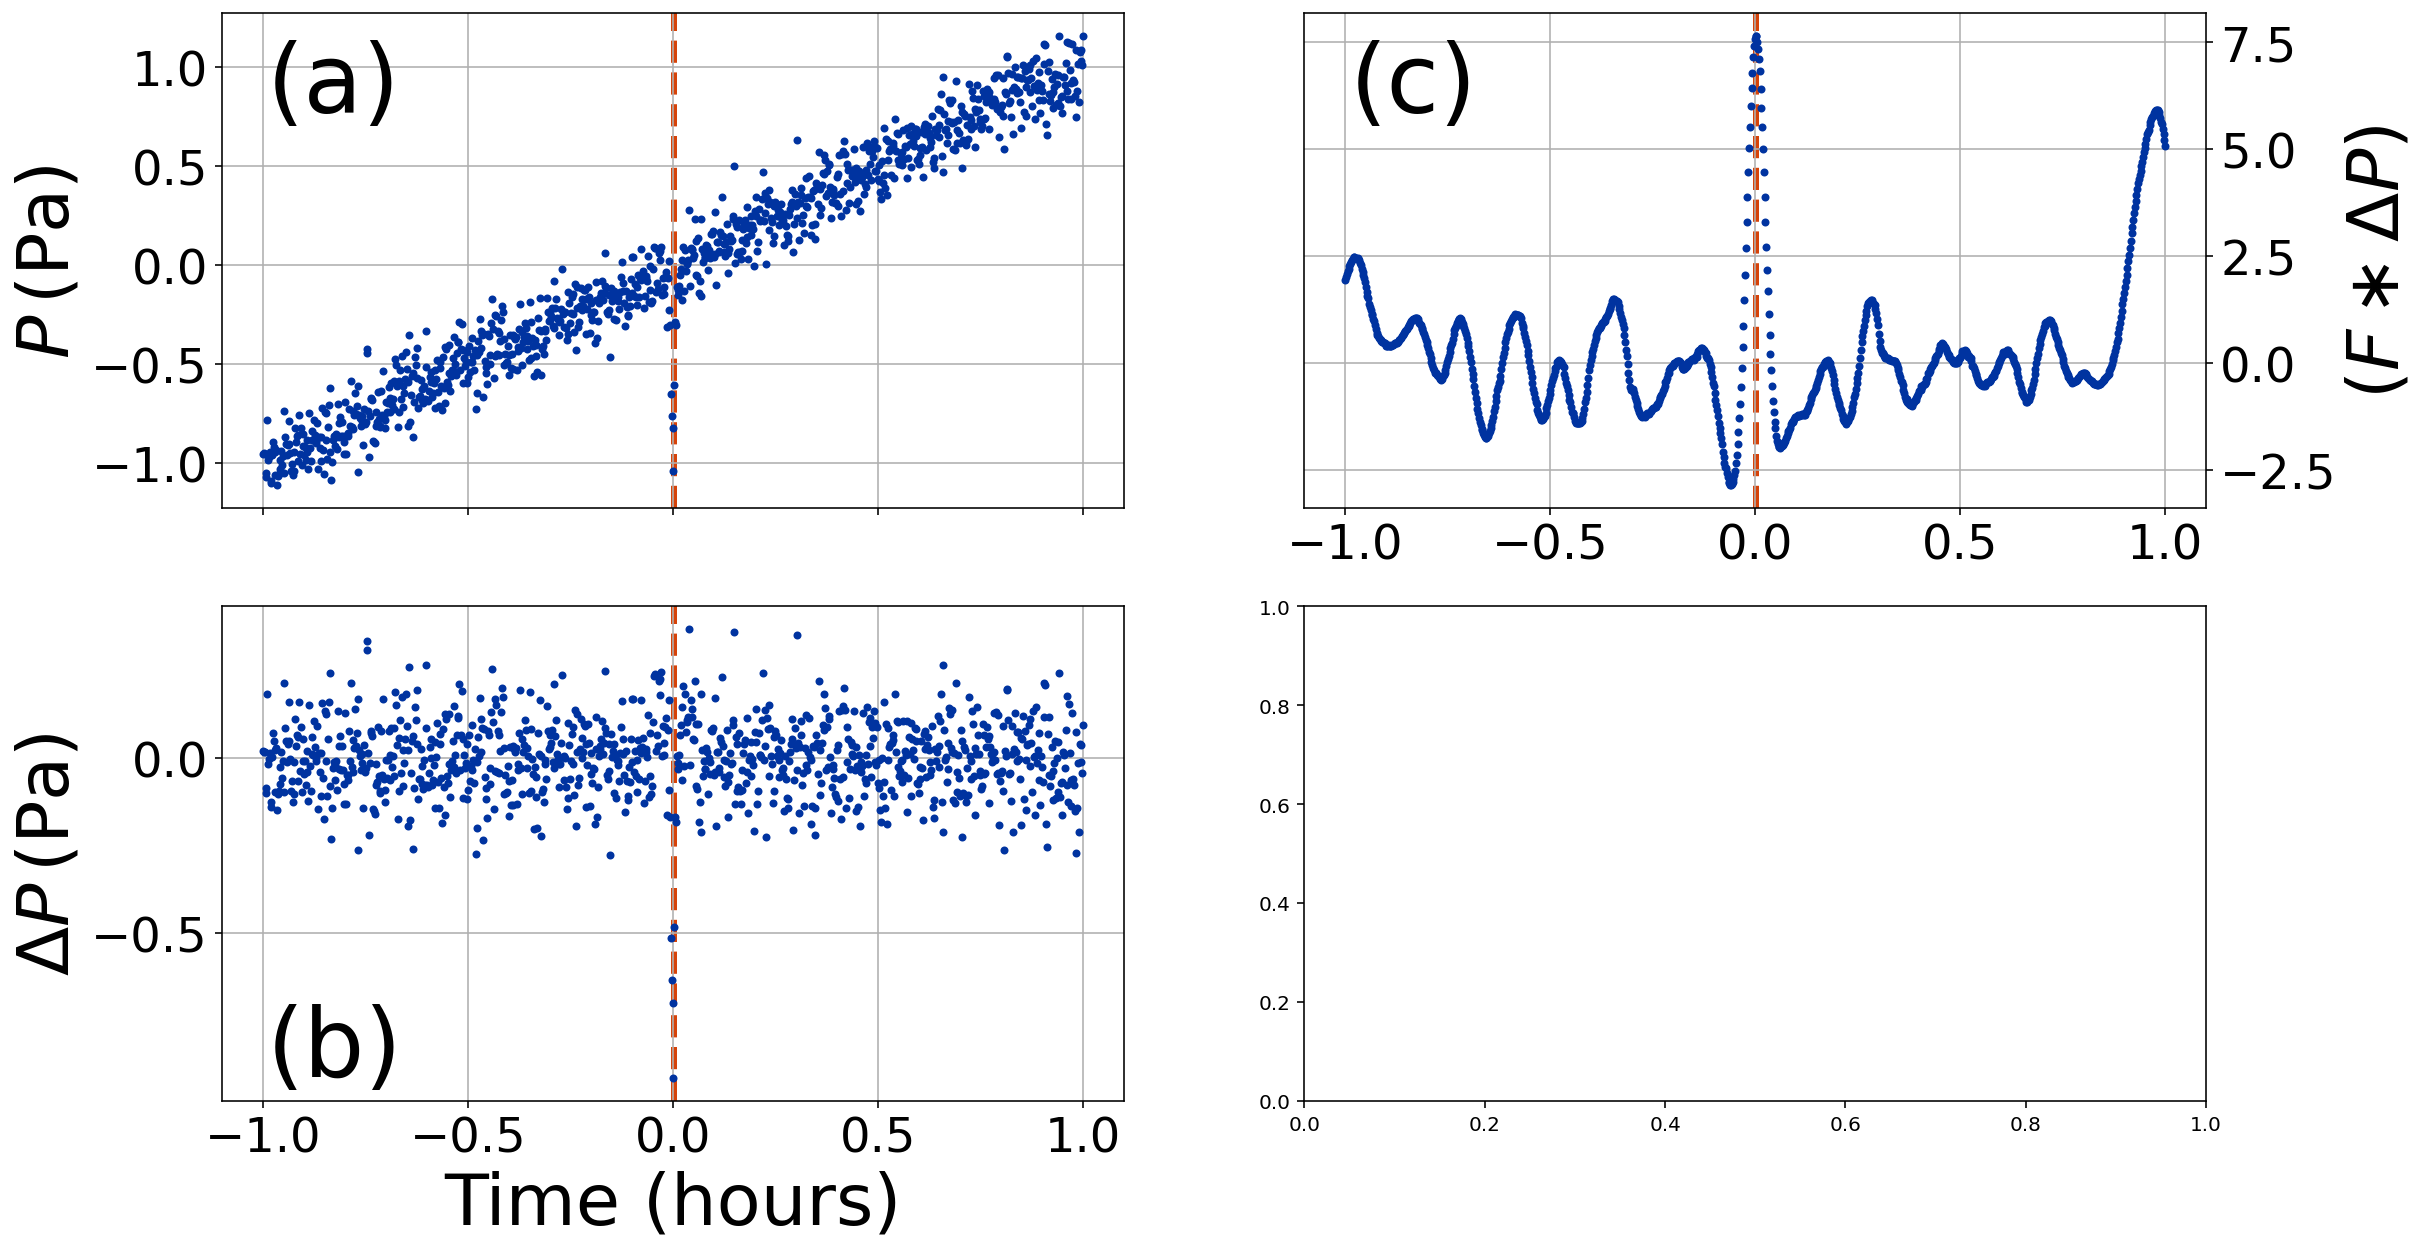

In [44]:
mt.make_conditioned_data_figure();